# An Algebraic Simulation of Grover's Algorithm

We simulate the grover simulation as a Python Object with multiple options

In [1]:
class grover_simulation():
    
    def __init__(self, number_of_qubits, target_elements):
        '''
        This section of the simulation initializes the following variables of the simulation:
            1. Number of States
            2. A set of all the states
            3. Target elements and their index
            4. Matrix of Amplitudes
            5. Set of probabilities for plotting
        
        '''
        self.number_of_states = 2**number_of_qubits   ## Number of states is always 2^n
        import itertools ## Combination of all the states
        self.all_states = list(itertools.product([0, 1], repeat=number_of_qubits))
        
        self.targets = [] ## Finding the index of all the targets
        
        for element in target_elements:
            self.targets.append(self.all_states.index(element))
            
        ## Matrix of amplitudes
        
        self.matrix = [1/(2**number_of_qubits)**0.5 for _ in range(self.number_of_states)]
        
        ## Target probabilities and other probabilities
        initial_target_prob = (self.matrix[0]**2)*len(self.targets)
        self.target_probabilities = [initial_target_prob]
        self.other_probabilities = [1-initial_target_prob]
    
    def oracle(self):
        '''
        This section of the simulation flips the sign on the target amplitudes.
        
        '''      
        for target in self.targets:
            self.matrix[target] = - self.matrix[target] 
    
    def grovers_operator(self):
        '''
        This section accomplishes the following tasks:
            1. Calculate mean and change the amplitudes to (2*mean - amplitude).
            2. Update the target probabilities.
        '''      
        import numpy as np
        
        mean = np.mean(self.matrix)  ## Find the mean
        new_matrix = [0 for i in range(16)]
        
        for i in range(len(self.matrix)): ## Replacing new amplitudes
            new_matrix[i] = 2*mean - self.matrix[i]
        
        self.matrix = new_matrix ## Updating the amplitude matrix
    
        target_prob = 0  ## Updating the probabilities
        other_prob = 0
    
        for i in range(len(self.matrix)):
            if i in self.targets:
                target_prob += (self.matrix[i])**2  ## Adding all the target probabilities
            else:
                other_prob += (self.matrix[i])**2  ## The rest of the probabilities
        
        self.target_probabilities.append(target_prob)
        self.other_probabilities.append(other_prob)
    
    def plot_probabilities(self):   ## Plotting all the probabilities
        
        import matplotlib.pyplot as plt
        import seaborn as sns; sns.set()
        
        n = len(self.target_probabilities)
        
        plt.figure(figsize=(12,6))  ## Plotting the target probabilities against other probs
        plt.plot(range(n),self.target_probabilities, label='Target Probability')
        plt.plot(range(n),self.other_probabilities, label='Non-Target Probability')
        plt.title('The change in probability of measuring the target states over {} Iterations '.format(n-1) 
                  + 'of Grovers Algorithm \n',fontsize=15)
        plt.xlabel('Iterations', fontsize=15)
        plt.ylabel('Probabilities', fontsize=15)
        plt.legend()
        plt.show()

### Simulation for 15 iterations and 1 target state

In [2]:
new_sim = grover_simulation(4, [(0,0,1,0)]) # Specified only one state here

for i in range(15):
    new_sim.oracle()
    new_sim.grovers_operator()
    
new_sim.plot_probabilities()

<Figure size 1200x600 with 1 Axes>

### Simulation for 15 iterations and 2 target states

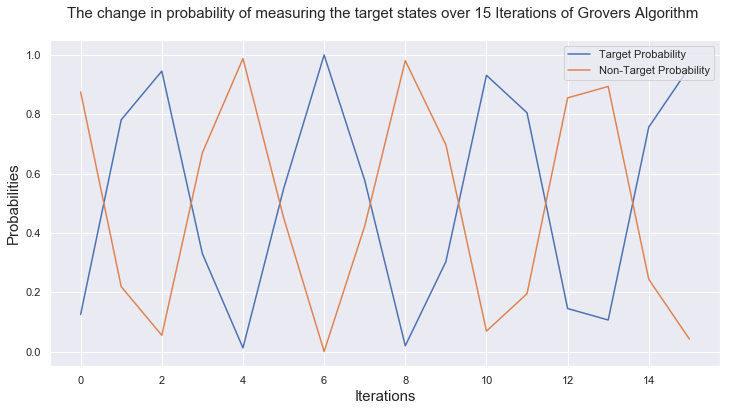

In [3]:
new_sim = grover_simulation(4, [(0,0,1,0), (0,1,1,0)]) #Specified two states here

for i in range(15):
    new_sim.oracle()
    new_sim.grovers_operator()
    
new_sim.plot_probabilities()